<a href="https://colab.research.google.com/github/kathleenreily/economicfreedom/blob/master/EconomicFreedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #standard packages plus winsorize method and evaluating models
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats.mstats import winsorize

from scipy.stats import boxcox #visualizing data

import math
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split #building and evaluating the model
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier #a few models to try
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from matplotlib import pyplot
from pandas import DataFrame

from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

from sklearn import linear_model #OLS model
from sklearn import neighbors #knn regression model

import statsmodels.formula.api as smf #meeting assumptions of the model
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sklearn import tree
from IPython.display import Image
import itertools
import pydotplus #visualizing the decision tree
import graphviz
from sklearn import ensemble #ensemble modeling such as boost and random forest
from sklearn.model_selection import cross_val_score 
from sklearn.svm import SVC #support vector model


import statsmodels.api as sm #interpreting coefficients
from mpl_toolkits.mplot3d import Axes3D #3D plotting


from sklearn.metrics import mean_absolute_error #making predictions and model improvement
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**My purpose** 

> To measure economic freedom globally, against multiple variables that could significantly effect levels of economic freedom amongst developed and developing nations.



**Dataset** 

> I found my dataset from Kaggle, titled Econmic Freedom of the World, and you can find it [here](https://www.kaggle.com/gsutters/economic-freedom?select=efw_cc.csv).

> It measures the follow areas, the size of government, the legal system and property rights, and sound and stable monetary system, freedom to trade internationally, and level of regulatory constraint. There are 34 features and 3,726 rows in the dataset.









In [2]:
#upload data

from google.colab import drive
drive.mount('/content/drive')

econfree_df = pd.read_csv('/content/drive/My Drive/DS projects and datasets/economicfreedom.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Getting to know the dataset**

In [3]:
econfree_df

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,2b_impartial_courts,2c_protection_property_rights,2d_military_interference,2e_integrity_legal_system,2f_legal_enforcement_contracts,2g_restrictions_sale_real_property,2h_reliability_police,2i_business_costs_crime,2j_gender_adjustment,2_property_rights,3a_money_growth,3b_std_inflation,3c_inflation,3d_freedom_own_foreign_currency,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287,6.933500,6.215401,0.948718,5.071814,8.986454,9.484575,9.74360,10.0,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692,6.136845,6.737383,0.820513,4.690743,6.955962,8.339152,8.72046,5.0,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,3.333333,4.166667,2.302200,5.455882,3.016104,4.291197,0.846154,2.963635,9.385679,4.986742,3.05400,5.0,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,7.500000,3.333333,3.632872,6.857195,3.385786,4.133832,0.769231,3.904030,5.233264,5.224079,2.00000,10.0,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,5.833333,5.000000,5.196693,9.801963,5.714028,7.007654,1.000000,5.809215,9.078264,9.263496,9.74600,10.0,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,1970,VEN,Venezuela,7.18,10.0,1.0,6.602003,9.827430,7.0,NaN,7.809811,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.381393,9.530708,9.580000,9.74400,10.0,9.713677,8.066667,NaN,10.00000,8.000000,8.688889,9.679680,NaN,NaN,5.312277
3722,1970,VNM,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3723,1970,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3724,1970,ZMB,Zambia,NaN,NaN,NaN,3.448131,9.105430,0.0,NaN,4.184521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,8.300755,4.512000,7.72200,0.0,5.133689,NaN,NaN,0.00000,2.000000,NaN,7.327327,NaN,NaN,NaN


In [4]:
econfree_df.info()

#3,726 rows and 36 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                3726 non-null   int64  
 1   ISO_code                            3726 non-null   object 
 2   countries                           3726 non-null   object 
 3   ECONOMIC FREEDOM                    3003 non-null   float64
 4   rank                                3003 non-null   float64
 5   quartile                            3003 non-null   float64
 6   1a_government_consumption           3137 non-null   float64
 7   1b_transfers                        2766 non-null   float64
 8   1c_gov_enterprises                  3080 non-null   float64
 9   1d_top_marg_tax_rate                2679 non-null   float64
 10  1_size_government                   3079 non-null   float64
 11  2a_judicial_independence            2173 no

In [5]:
econfree_df.describe()

#average economic freedom score amongst all dataset nations is 6.5, with a low score being 1.9 and a high score being 9.1

,year,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,2b_impartial_courts,2c_protection_property_rights,2d_military_interference,2e_integrity_legal_system,2f_legal_enforcement_contracts,2g_restrictions_sale_real_property,2h_reliability_police,2i_business_costs_crime,2j_gender_adjustment,2_property_rights,3a_money_growth,3b_std_inflation,3c_inflation,3d_freedom_own_foreign_currency,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
count,3726.000000,3003.000000,3003.000000,3003.000000,3137.000000,2766.000000,3080.000000,2679.000000,3079.000000,2173.000000,2547.000000,2597.000000,2540.000000,2573.000000,2365.000000,2342.000000,1655.000000,1655.000000,3660.000000,2971.000000,3082.000000,3119.000000,3119.000000,3105.000000,3115.000000,3045.000000,2378.000000,3109.000000,3134.000000,3035.000000,3107.000000,2568.000000,2324.000000,2998.000000
mean,2001.347826,6.519640,68.307026,2.497835,5.862426,7.672901,5.737987,5.813177,6.232061,5.019474,4.675344,5.487056,6.509514,6.200048,4.449030,7.045415,5.505016,5.903587,0.873173,5.252947,8.235107,8.007863,8.463707,5.919485,7.660619,7.078796,6.332996,9.115282,4.376398,6.719849,7.732523,6.168449,6.188570,6.638470
std,12.735125,1.133638,41.343417,1.118963,2.270241,2.138957,3.242377,2.654083,1.447985,2.249670,1.763001,2.018636,2.763686,2.381568,1.729567,2.024819,1.980389,1.861813,0.174714,1.788427,1.747387,2.242955,1.935602,4.396573,1.812816,1.821355,1.712494,2.460966,2.694049,1.720183,2.123763,1.509150,1.268471,1.240397
min,1970.000000,1.970000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.653797,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.955583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.837167,2.009841,1.002000
25%,1995.000000,5.855000,33.000000,1.000000,4.450000,6.207809,4.000000,4.000000,5.229374,3.259067,3.351503,4.092470,4.500000,4.166667,3.376287,6.001264,4.064223,4.640609,0.793103,3.943870,7.866486,7.555215,8.192373,0.000000,6.604056,6.208800,5.462975,10.000000,2.000000,5.946710,6.800388,5.072882,5.386941,5.877893
50%,2005.000000,6.680000,66.000000,3.000000,6.082353,8.432251,7.000000,6.000000,6.319653,4.698028,4.333333,5.298992,6.666667,6.666667,4.491576,7.528184,5.321285,6.054866,0.956379,5.230569,8.696775,8.881272,9.106000,5.000000,7.968903,7.480000,6.592045,10.000000,4.768803,7.011524,8.305564,6.197257,6.169513,6.759404
75%,2011.000000,7.350000,102.000000,3.000000,7.571360,9.482289,8.000000,8.000000,7.267682,6.822563,5.856558,7.057639,8.333333,8.333333,5.583266,8.523296,7.110703,7.315395,1.000000,6.392517,9.256394,9.404155,9.574234,10.000000,9.257395,8.333483,7.515852,10.000000,6.493357,7.916308,9.333333,7.344125,7.007430,7.486336
max,2016.000000,9.190000,162.000000,4.000000,10.000000,10.000000,10.000000,10.000000,9.904651,9.816667,9.686000,10.000000,10.000000,10.000000,8.478714,9.981101,9.688242,9.672608,1.000000,9.278333,9.999031,9.952306,10.000000,10.000000,9.922187,10.000000,9.833333,10.000000,10.000000,10.000000,10.000000,9.725000,9.503739,9.439828


**Cleaning The Dataset**

Renaming the variables for easier readability

In [6]:
econfree_df = econfree_df.rename(columns={'ECONOMIC FREEDOM': 'economic_freedom', '1d_top_marg_tax_rate': 'tax_rate', '	1_size_government': 'gov_size', '2a_judicial_independence': 'judicial_idep',
                                          '2b_impartial_courts': 'impartial_courts', '2c_protection_property_rights': 'protect_propright',
                                          '2d_military_interference': 'military_interference', '2e_integrity_legal_system': 'integrity_legal_system',
                                          '2f_legal_enforcement_contracts': 'legal_enforcement_contracts', '2h_reliability_police': 'reliability_police',
                                          '2_property_rights': 'property_rights', '3a_money_growth': 'money_growth', '3c_inflation': 'inflation',
                                          '3_sound_money': 'sound_money', '4a_tariffs': 'tariffs', '4b_regulatory_trade_barriers': 'regulatory_trade_barriers',
                                          '4c_black_market': 'black_market', '4d_control_movement_capital_ppl': 'control_movement_capital_ppl',
                                          '4_trade': 'trade', '5a_credit_market_reg': 'credit_market_reg', '5b_labor_market_reg':'labor_market_reg',
                                          '5c_business_reg': 'business_reg', '5_regulation': 'regulation'})

In [7]:
econfree_df

,year,ISO_code,countries,economic_freedom,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,tax_rate,1_size_government,judicial_idep,impartial_courts,protect_propright,military_interference,integrity_legal_system,legal_enforcement_contracts,2g_restrictions_sale_real_property,reliability_police,2i_business_costs_crime,2j_gender_adjustment,property_rights,money_growth,3b_std_inflation,inflation,3d_freedom_own_foreign_currency,sound_money,tariffs,regulatory_trade_barriers,black_market,control_movement_capital_ppl,trade,credit_market_reg,labor_market_reg,business_reg,regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,7.935564,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287,6.933500,6.215401,0.948718,5.071814,8.986454,9.484575,9.74360,10.0,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,3.616782,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692,6.136845,6.737383,0.820513,4.690743,6.955962,8.339152,8.72046,5.0,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,6.496685,1.843129,1.974566,2.512364,3.333333,4.166667,2.302200,5.455882,3.016104,4.291197,0.846154,2.963635,9.385679,4.986742,3.05400,5.0,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,5.346056,3.689690,2.930563,4.255995,7.500000,3.333333,3.632872,6.857195,3.385786,4.133832,0.769231,3.904030,5.233264,5.224079,2.00000,10.0,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,7.003310,3.867379,4.197569,5.664317,5.833333,5.000000,5.196693,9.801963,5.714028,7.007654,1.000000,5.809215,9.078264,9.263496,9.74600,10.0,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3721,1970,VEN,Venezuela,7.18,10.0,1.0,6.602003,9.827430,7.0,NaN,7.809811,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.381393,9.530708,9.580000,9.74400,10.0,9.713677,8.066667,NaN,10.00000,8.000000,8.688889,9.679680,NaN,NaN,5.312277
3722,1970,VNM,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3723,1970,YEM,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3724,1970,ZMB,Zambia,NaN,NaN,NaN,3.448131,9.105430,0.0,NaN,4.184521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,8.300755,4.512000,7.72200,0.0,5.133689,NaN,NaN,0.00000,2.000000,NaN,7.327327,NaN,NaN,NaN


Dropping the variables I don't need

In [8]:
econfree_df = econfree_df.drop(['1b_transfers', '1c_gov_enterprises', '2i_business_costs_crime', '2j_gender_adjustment', 
                                '3b_std_inflation', '3d_freedom_own_foreign_currency','ISO_code', '1a_government_consumption',
                                '2g_restrictions_sale_real_property', 'reliability_police', 'judicial_idep', 'labor_market_reg'], axis = 1)

Identify the nulls

We're going to drop the variables have more than 1,100 nulls which are reliability of police, judicial idep, labor market reg

In [9]:
total_missing = econfree_df.isnull().sum().sort_values(ascending=False)
percent_missing = (econfree_df.isnull().sum()/econfree_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
business_reg,1402,0.376275
legal_enforcement_contracts,1361,0.365271
regulatory_trade_barriers,1348,0.361782
military_interference,1186,0.318304
impartial_courts,1179,0.316425
integrity_legal_system,1153,0.309447
protect_propright,1129,0.303006
tax_rate,1047,0.280998
property_rights,755,0.202630
regulation,728,0.195384


Handle Missing Nulls

In [10]:
econfree_df.quartile = econfree_df.quartile.fillna(method='ffill') #let's fill the quartile column

num_names = econfree_df._get_numeric_data().columns #seperate numeric values to fill missing spaces
econfree_df[num_names] = econfree_df.groupby('year')[num_names].transform(lambda x: x.fillna(x.median())) 

Check to be sure there are no nulls

we can see there are still some missing values

In [11]:
econfree_df.isnull().sum()

year                              0
countries                         0
economic_freedom                  0
rank                              0
quartile                          0
tax_rate                          0
1_size_government                 0
impartial_courts                810
protect_propright                 0
military_interference           810
integrity_legal_system          324
legal_enforcement_contracts     972
property_rights                   0
money_growth                      0
inflation                         0
sound_money                       0
tariffs                           0
regulatory_trade_barriers       810
black_market                      0
control_movement_capital_ppl      0
trade                             0
credit_market_reg                 0
business_reg                    810
regulation                        0
dtype: int64

Take the median of the quartile and fill the missing areas that way

In [12]:
econfree_df.quartile = econfree_df.quartile.astype('object')

econfree_df[['impartial_courts','military_interference','integrity_legal_system','legal_enforcement_contracts','regulatory_trade_barriers','business_reg']] = econfree_df.groupby('quartile')\
    [['impartial_courts','military_interference','integrity_legal_system','legal_enforcement_contracts','regulatory_trade_barriers','business_reg']].transform(lambda x: x.fillna(x.median()))


All missing values have been dealt with

In [13]:
econfree_df.isnull().sum()

year                            0
countries                       0
economic_freedom                0
rank                            0
quartile                        0
tax_rate                        0
1_size_government               0
impartial_courts                0
protect_propright               0
military_interference           0
integrity_legal_system          0
legal_enforcement_contracts     0
property_rights                 0
money_growth                    0
inflation                       0
sound_money                     0
tariffs                         0
regulatory_trade_barriers       0
black_market                    0
control_movement_capital_ppl    0
trade                           0
credit_market_reg               0
business_reg                    0
regulation                      0
dtype: int64

**Exploratory data analysis**

> Economic freedom is my target variable, let's look at a correlation matrix to see the variables with the greatest impact on Y

> We can see the variables with strongest correlations are regulation, sound money, property rights, control of movement of people, and trade





In [14]:
econfree_df.corr()

,year,economic_freedom,rank,tax_rate,1_size_government,impartial_courts,protect_propright,military_interference,integrity_legal_system,legal_enforcement_contracts,property_rights,money_growth,inflation,sound_money,tariffs,regulatory_trade_barriers,black_market,control_movement_capital_ppl,trade,credit_market_reg,business_reg,regulation
year,1.000000,0.442865,0.336388,0.600110,0.301511,-0.079042,-0.021663,-0.067265,-0.047132,-0.018891,0.096163,0.112208,0.274087,0.372567,0.396740,-0.139239,0.415128,0.432926,0.462693,0.471165,0.030654,0.503949
economic_freedom,0.442865,1.000000,-0.611561,0.370556,0.338937,0.482712,0.529405,0.531968,0.469098,0.427684,0.712464,0.437986,0.540965,0.818941,0.626672,0.488127,0.563825,0.757705,0.859832,0.709526,0.565762,0.809032
rank,0.336388,-0.611561,1.000000,0.128892,-0.028038,-0.576034,-0.558818,-0.650164,-0.524996,-0.497252,-0.672283,-0.273057,-0.240226,-0.501829,-0.282418,-0.675191,-0.112137,-0.426787,-0.440619,-0.273152,-0.626828,-0.407976
tax_rate,0.600110,0.370556,0.128892,1.000000,0.564111,-0.063131,-0.160828,-0.097697,-0.127014,-0.009357,-0.039266,0.024764,0.112401,0.249978,0.282089,-0.096046,0.313372,0.344618,0.343800,0.334174,0.000045,0.372624
1_size_government,0.301511,0.338937,-0.028038,0.564111,1.000000,-0.140866,-0.138346,-0.174952,-0.258167,-0.092446,-0.144595,0.023641,0.048585,0.149549,0.104946,-0.131339,0.217022,0.191529,0.177003,0.246427,-0.033942,0.232996
impartial_courts,-0.079042,0.482712,-0.576034,-0.063131,-0.140866,1.000000,0.664509,0.557235,0.583604,0.434505,0.723226,0.217743,0.226246,0.301023,0.172607,0.577992,0.172430,0.307396,0.362371,0.241390,0.672797,0.416804
protect_propright,-0.021663,0.529405,-0.558818,-0.160828,-0.138346,0.664509,1.000000,0.480020,0.583474,0.367993,0.754327,0.279764,0.274999,0.385735,0.262338,0.493486,0.199221,0.295112,0.397869,0.263758,0.624975,0.400715
military_interference,-0.067265,0.531968,-0.650164,-0.097697,-0.174952,0.557235,0.480020,1.000000,0.563481,0.478877,0.724795,0.231995,0.227485,0.413634,0.253429,0.578865,0.195597,0.376345,0.421593,0.308615,0.520273,0.416668
integrity_legal_system,-0.047132,0.469098,-0.524996,-0.127014,-0.258167,0.583604,0.583474,0.563481,1.000000,0.506390,0.766555,0.214616,0.235079,0.335407,0.250799,0.488748,0.190882,0.303694,0.378232,0.240909,0.515249,0.348113
legal_enforcement_contracts,-0.018891,0.427684,-0.497252,-0.009357,-0.092446,0.434505,0.367993,0.478877,0.506390,1.000000,0.620973,0.102848,0.137034,0.294829,0.236752,0.435832,0.091057,0.281124,0.312880,0.253473,0.471583,0.333646


Heatmap

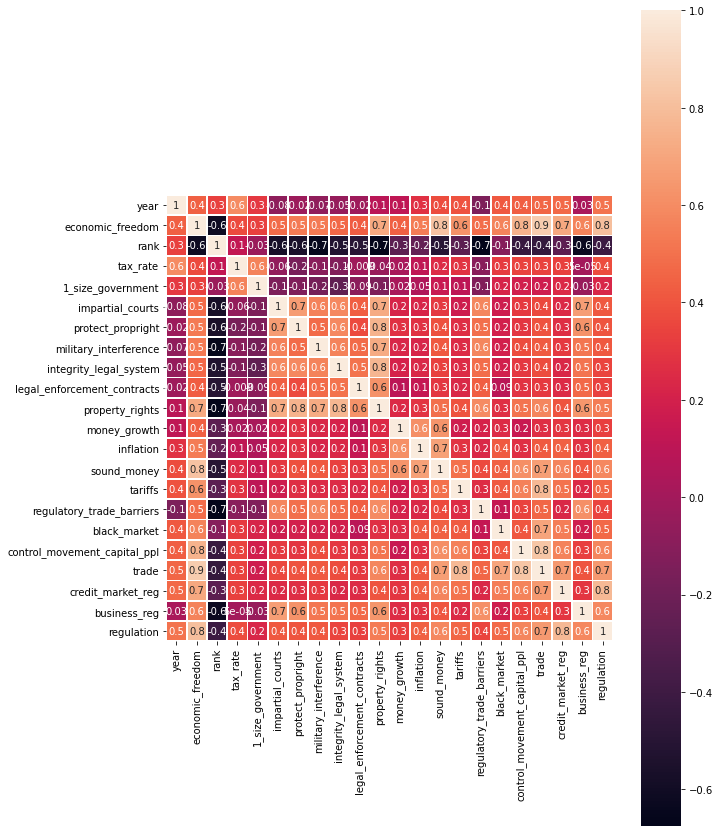

In [15]:
plt.subplots(figsize=(10,15)) 
sns.heatmap(econfree_df.corr(), annot = True, linewidths=.8, square=True, fmt='.1g')

Look at the correlation between our x features as well as y

> We can see that trade and control of people capital movement are too correlated, we're going to drop people movement capital and keep trade because it has a higher correlation with our Y



In [16]:
var_corr = econfree_df[['property_rights', 'control_movement_capital_ppl', 'sound_money', 'trade', 'regulation', 'economic_freedom']]
var_corr.corr()

,property_rights,control_movement_capital_ppl,sound_money,trade,regulation,economic_freedom
property_rights,1.000000,0.514319,0.491592,0.577462,0.537929,0.712464
control_movement_capital_ppl,0.514319,1.000000,0.611695,0.833975,0.581074,0.757705
sound_money,0.491592,0.611695,1.000000,0.668898,0.583469,0.818941
trade,0.577462,0.833975,0.668898,1.000000,0.651569,0.859832
regulation,0.537929,0.581074,0.583469,0.651569,1.000000,0.809032
economic_freedom,0.712464,0.757705,0.818941,0.859832,0.809032,1.000000


Building our equation

First let's look at the distribution of our Y variable

We can see it is normally distributed

Text(0.5, 1.0, 'histogram of economic freedom')

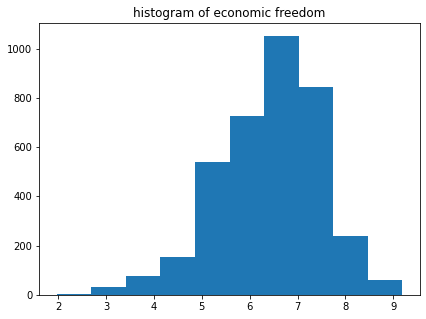

In [17]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(econfree_df['economic_freedom'])
plt.title("histogram of economic freedom")

Create our X and Y variable and begin building our linear regression model

In [18]:
X = econfree_df[['property_rights', 'sound_money', 'trade', 'regulation']] 
Y = econfree_df.economic_freedom

**Modeling Phase**

> OLS Model on X and Y



In [19]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

print(results.summary())

lrm = linear_model.LinearRegression()

# estimating the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

#excellent generalization gap, and perfect p values, let's create our test and training sets

                            OLS Regression Results                            
Dep. Variable:       economic_freedom   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.333e+04
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:52:31   Log-Likelihood:                -450.25
No. Observations:                3726   AIC:                             910.5
Df Residuals:                    3721   BIC:                             941.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.0040      0.026     

Our equation is as follows:

> economic_freedomY = 1 + 0.13property_rights +0.20sound_money + 0.21trade +0.26regulation +e


Evaluation: with one additional point increase in economic freedom, we can see an increase in property rights of 0.13, in sound money of 0.20, in trade of 0.21, and in regulation of 0.26.

Split the data into test and train sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 2980
The number of observations in test set is 746


Add a constant to our X_train and train the OLS model on our training data

In [21]:
X_train = sm.add_constant(X_train)

In [22]:
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       economic_freedom   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.103e+04
Date:                Tue, 30 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:52:31   Log-Likelihood:                -345.08
No. Observations:                2980   AIC:                             700.2
Df Residuals:                    2975   BIC:                             730.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.9808      0.029     

Evaluation: The OLS model performs very well, as it has a perfect generalization gap, the p values are excellent as are the error scores, and the AIC and BIC decreased by 200 points compared to our first OLS model.

> Make our predictions on x train and x test



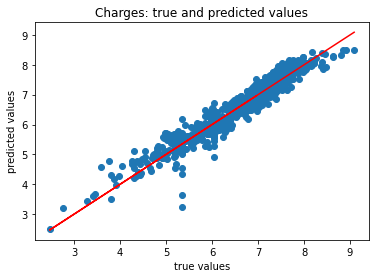

R-squared of the model in training set is: 0.93682179137037
-----Test set statistics-----
R-squared of the model in test set is: 0.9254523122523448
Mean absolute error of the prediction is: 0.2034531454427097
Mean squared error of the prediction is: 0.07747408087579492
Root mean squared error of the prediction is: 0.2783416621273124
Mean absolute percentage error of the prediction is: 3.328197645487378


In [57]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

Evaluation: We can see an excellent generalization gap and our error scores are very low. Because the test R^2 and the train R^2 are close to one another we don't have overfitting.

> Impliment more linear regressor models



Lasso

In [24]:
lassoregr = Lasso(alpha=10**20.5) 
lassoregr.fit(X_train, y_train)


y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0014407433807517302
Mean absolute error of the prediction is: 0.8340138006729404
Mean squared error of the prediction is: 1.0407526174067951
Root mean squared error of the prediction is: 1.0201728370265477
Mean absolute percentage error of the prediction is: 13.981822448424957




> Performance is poor



Ridge Model

In [25]:
ridgeregr = Ridge(alpha=10**37) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

#poor performance on the train and test

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0014407433807517302
Mean absolute error of the prediction is: 0.8340138006729404
Mean squared error of the prediction is: 1.0407526174067951
Root mean squared error of the prediction is: 1.0201728370265477
Mean absolute percentage error of the prediction is: 13.981822448424957




> Performance is poor



ElasticNet Model

In [26]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**21, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

#poor performance as well

R-squared of the model on the training set is: 0.0
-----Test set statistics-----
R-squared of the model on the test set is: -0.0014407433807517302
Mean absolute error of the prediction is: 0.8340138006729404
Mean squared error of the prediction is: 1.0407526174067951
Root mean squared error of the prediction is: 1.0201728370265477
Mean absolute percentage error of the prediction is: 13.981822448424957




> Performance is poor



Support Vector Model

In [27]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train) 

svr.score(X_test, y_test) 

0.9346772247951802

93% is high for explanatory power

And our cross val scores below are quite high, an average of about 92%

In [28]:
cross_val_score(svr, X_train, y_train, cv=5)

array([0.94681896, 0.92983278, 0.94358483, 0.93974799, 0.94536625])

Random Forest Model

> Create parameters inside our Random Forest Model



In [53]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

In [50]:
rfc = ensemble.RandomForestRegressor()
rfc.fit(X_train,y_train)

cross_val_score(svr, X_train, y_train, cv=5)

array([0.94681896, 0.92983278, 0.94358483, 0.93974799, 0.94536625])

The cross val scores are quite high with little variance

> After increasing the max dept and the number of features in the hyperparameters above i found that my rfc score dropped so I lowered both parameters again



In [51]:
rfc.score(X_test, y_test)

0.9401723430115932



> We can see the mean score for our train data is almost identical to the rfc score on our test data, this model has strong explanatory power compare to the others



In [52]:
cross_val_score(svr, X_train, y_train, cv=5).mean()

0.9410701614556182



> We can see that the rfc score is better than ols and svm at 94 the R^2 for ols was 92, and the score for svm was 93



**Choosing The Right Model:** Both the OLS and SVM models performed well in the R^2 OLS prediction and the SVM cross val score. The Random Forest model performed bettwe however, the score was 94, whereas the other two were 93 and 92. As a result though I will choose the RFM model as it outperforms compared to the other two. 

**Conclusion:** Countries with strong property rights, low and less volatile inflation, high levels of free international trade, and low levels of government regulation will be most effected by increased or decreased levels of economic freedom. The variables that are  particularly influenced are freedom of trade and government regulation, as they have the highest coefficients meaning the greatest fluctuations as a result of impact from economic freedom. 